<a href="https://colab.research.google.com/github/BelKaty/BelKatyParsing/blob/main/HW9_finaltest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сбор и разметка данных (семинары)
## Урок 9. Инструменты разметки наборов данных


**Задание 1.**

Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

**Задание 2.**

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

**Задача 3.**

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

**Задача 4.**

Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

**Задача 5.**

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

**Задача 6.**

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [1]:
# Устанавливаем пакеты, если они не установлены
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn
# !pip install matplotlib
# !pip install wget

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

### Загрузим датасет ([Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv](https://data.world/datafiniti/consumer-reviews-of-amazon-products)).
Этот датасет представляет из себя список из 5000 отзывов потребителей о продуктах Amazon, предоставленных базой данных продуктов Datafiniti. Набор данных включает основную информацию о продукте, рейтинг, текст обзора и многое другое для каждого продукта. Также из датасета можно получить следующую информацию:
- Какие продукты Amazon пользуются наибольшим спросом?
- Каково начальное и текущее количество отзывов покупателей о каждом продукте?
- Как соотносятся отзывы в первые 90 дней после запуска продукта с его ценой?
- Как соотносятся отзывы за первые 90 дней после запуска продукта с днями, доступными для продажи?
- Сопоставление ключевых слов в тексте обзора с оценками отзывов, для помощи в разработке моделей настроений.

In [3]:
data = pd.read_csv("/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

### Смотрим, что загрузили

In [4]:
data.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


### Подсчитаем общее количество пустых значений

In [5]:
data.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          1
sourceURLs                0
dtype: int64

### Делаем разметку. Создаем список с отзывом и рейтингом

In [6]:
data = data[['reviews.text','reviews.rating']]. copy ()
data[data['reviews.rating'] < 4]
data

,reviews.text,reviews.rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5
...,...,...
4995,This is a great tablet for the price. Amazon i...,5
4996,This tablet is the perfect size and so easy to...,5
4997,Purchased this for my son. Has room to upgrade...,4
4998,I had some thoughts about getting this for a 5...,5


### Посмотрим соотношение меток

<Axes: >

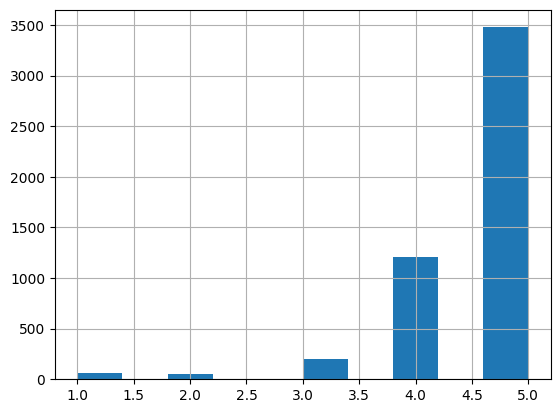

In [7]:
data["reviews.rating"].hist()

### Определим функцию для разделения отзывов по рейтингу

In [8]:
def rule_rating(row):
    if row["reviews.rating"] > 3:
        return  1
    elif row["reviews.rating"] <= 3:
        return  0

In [9]:
data["Rating_label"] = data.apply(rule_rating, axis=1)

<Axes: >

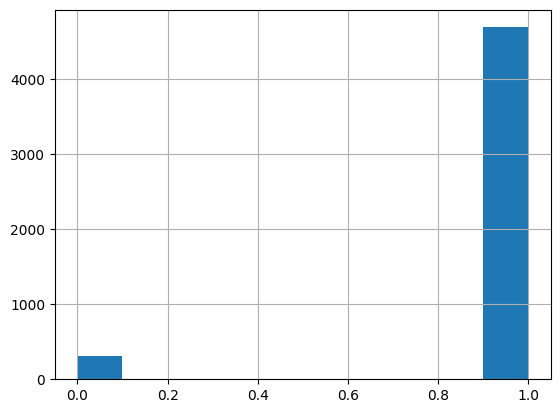

In [10]:
data['Rating_label'].hist()

In [11]:
data = data[data['reviews.rating'].notnull()]
data

,reviews.text,reviews.rating,Rating_label
0,I thought it would be as big as small paper bu...,3,0
1,This kindle is light and easy to use especiall...,5,1
2,Didnt know how much i'd use a kindle so went f...,4,1
3,I am 100 happy with my purchase. I caught it o...,5,1
4,Solid entry level Kindle. Great for kids. Gift...,5,1
...,...,...,...
4995,This is a great tablet for the price. Amazon i...,5,1
4996,This tablet is the perfect size and so easy to...,5,1
4997,Purchased this for my son. Has room to upgrade...,4,1
4998,I had some thoughts about getting this for a 5...,5,1


In [12]:
labeled_reviews, unlabeled_reviews = train_test_split(data, train_size=0.5, random_state=56)

### Определим функцию для обучения модели

In [13]:
def train_model(labaled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labaled_data['reviews.text'])
    y = labaled_data['Rating_label']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

### Произведем обучение начальной модели на тренировочных данных

In [14]:
model, vect = train_model(labeled_reviews)

### Используем модель для прогнозирования меток для немаркированных данных

In [15]:
x_unlabeled = vect.transform(unlabeled_reviews['reviews.text'])
y_unlabeled_predicted = model.predict(x_unlabeled)

### Вычислим энтропию предсказаний

In [16]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainly = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [17]:
uncertainly

array([0.38596863, 0.18475466, 0.51020657, ..., 0.52098541, 0.23327439,
       0.50749536])

### Выберем 100 наиболее неопределенных данных и отдадим их человеку для маркировки вручную

In [18]:
labeled_reviews_new = unlabeled_reviews.iloc[uncertainly.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainly.argsort()[100:]]

In [19]:
labeled_reviews_new

,reviews.text,reviews.rating,Rating_label
2403,Great price - great shipping - great item! Per...,5,1
3987,Easy to use and great quality. All 3 of my kid...,5,1
4173,We got a great deal on Fire HD 8. My kids love...,5,1
1602,"bought this kindle for my grandson, he loves i...",5,1
2140,Love my mine! Works great with prime! And I ha...,5,1
...,...,...,...
4764,"Wife love it, reads a lot and this is her go t...",5,1
1857,This devices is great for storing all my amazo...,4,1
3437,Easy to use and elegant in design. Perfect Gif...,5,1
1018,I also have the smaller echo and this sounds m...,5,1


### Соединим размеченные человеком данные с тренировочным множеством

In [20]:
labeled_reviews = pd.concat([labeled_reviews, labeled_reviews_new])
labeled_reviews

,reviews.text,reviews.rating,Rating_label
3500,"Not an iPad, but that's not what I wanted. Hig...",5,1
1919,This was my second kindle and I didn't realize...,3,0
4508,"works great, easy to use. play videos and game...",4,1
2832,"Got this for my grand niece, she loves it. Can...",4,1
3715,"Not as fancy as the ipad, but a fraction of th...",4,1
...,...,...,...
4764,"Wife love it, reads a lot and this is her go t...",5,1
1857,This devices is great for storing all my amazo...,4,1
3437,Easy to use and elegant in design. Perfect Gif...,5,1
1018,I also have the smaller echo and this sounds m...,5,1


### Переобучим модель уже на новых данных

In [21]:
model, vect = train_model(labeled_reviews)

In [22]:
reviews_test = unlabeled_reviews
reviews_test

,reviews.text,reviews.rating,Rating_label
3296,I bought this for my daughter who wanted an iP...,5,1
4860,It is amazing that you can get this much tech ...,5,1
389,Already had 2 and when these when BB had a BIG...,5,1
2873,Gift for great nephew. Have 2 that are 5 and 6...,5,1
1420,The amazon echo plus has worked great. We like...,5,1
...,...,...,...
2542,This is the second one I bought. My grandkids ...,5,1
2570,My granddaughter loves her tablet toddler frie...,5,1
1350,like the Alexa but needs to be more interactiv...,3,0
4483,This Kindle Fire is lighter than my old one. T...,5,1


### Оценим качество модели на тестовом датасете

In [23]:
x_test = vect.transform(reviews_test['reviews.text'])
y_test_predicted = model.predict(x_test)
y_test_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
f1 = f1_score(reviews_test['Rating_label'], y_test_predicted)
f1

0.9720394736842105

### Вывод.
Была проведена работа с датасетом, в частности:

- разделение данные на тренировочные и тестовые,
предварительное обучение модели,
- внесение изменений в метки данных,
- добавление новых данных в обучающую выборку,
- обучение модели на новых данных,
- оценка качества модели.

Эффективность модели составила 97%